In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
balance_to_parse = 'https://ru.investing.com/instruments/Financials/changereporttypeajax?action=change_report_type&pair_ID=13697&report_type=' + 'BAL' + '&period_type=Annual'

income_to_parse ='https://ru.investing.com/instruments/Financials/changereporttypeajax?action=change_report_type&pair_ID=13697&report_type=' + 'INC' + '&period_type=Annual'

In [3]:
balance_resp = requests.get(balance_to_parse)
balance_tree = BeautifulSoup(balance_resp.content, 'html.parser')

# нашли табличку
balance_table = balance_tree.find('table')

# распарсили её
balance_df = pd.read_html(str(balance_table))[0]

balance_df.columns = [balance_tree.find_all('th')[0].span.text, balance_tree.find_all('th')[1].span.text, balance_tree.find_all('th')[2].span.text, balance_tree.find_all('th')[3].span.text, balance_tree.find_all('th')[4].span.text]
new_balance_df = balance_df.drop([1,12, 23,31,39,52], axis=0, inplace=False)
new_balance_df.replace('-', np.NaN, inplace=True)
new_balance_df.head()

,Период до:,2023,2021,2020,2019
0,Итого оборотные активы,562218,577067,362934,496496
2,Денежные средства и краткосрочные финансовые в...,157661,106097,182583,137614
3,Денежные средства,NaN,45920,119707,53240
4,Денежные средства и их эквиваленты,157661,45920,119707,83752
5,Краткосрочные финансовые вложения,NaN,60177,62876,622


In [4]:
new_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 51
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Период до:  47 non-null     object
 1   2023        31 non-null     object
 2   2021        41 non-null     object
 3   2020        40 non-null     object
 4   2019        39 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [5]:
new_balance_df.isnull().sum()

Период до:     0
2023          16
2021           6
2020           7
2019           8
dtype: int64

In [6]:
new_balance_df[balance_tree.find_all('th')[1].span.text] = new_balance_df[balance_tree.find_all('th')[1].span.text].apply(pd.to_numeric, errors='coerce')
new_balance_df[balance_tree.find_all('th')[2].span.text] = new_balance_df[balance_tree.find_all('th')[2].span.text].apply(pd.to_numeric, errors='coerce')
new_balance_df[balance_tree.find_all('th')[3].span.text] = new_balance_df[balance_tree.find_all('th')[3].span.text].apply(pd.to_numeric, errors='coerce')
new_balance_df[balance_tree.find_all('th')[4].span.text] = new_balance_df[balance_tree.find_all('th')[4].span.text].apply(pd.to_numeric, errors='coerce')
new_balance_df.head()

,Период до:,2023,2021,2020,2019
0,Итого оборотные активы,562218.0,577067.0,362934.0,496496.0
2,Денежные средства и краткосрочные финансовые в...,157661.0,106097.0,182583.0,137614.0
3,Денежные средства,NaN,45920.0,119707.0,53240.0
4,Денежные средства и их эквиваленты,157661.0,45920.0,119707.0,83752.0
5,Краткосрочные финансовые вложения,NaN,60177.0,62876.0,622.0


In [7]:
# заменить NaN на среднее значение в строке с 2-й колонки до конца
new_balance_df.iloc[:,1:] = new_balance_df.iloc[:, 1:].apply(lambda row: row.fillna(row.iloc[1:].mean()), axis=1)
new_balance_df.head()

,Период до:,2023,2021,2020,2019
0,Итого оборотные активы,562218.000000,577067.0,362934.0,496496.0
2,Денежные средства и краткосрочные финансовые в...,157661.000000,106097.0,182583.0,137614.0
3,Денежные средства,72955.666667,45920.0,119707.0,53240.0
4,Денежные средства и их эквиваленты,157661.000000,45920.0,119707.0,83752.0
5,Краткосрочные финансовые вложения,41225.000000,60177.0,62876.0,622.0


In [8]:
novatek_income_to_parse = 'https://ru.investing.com/instruments/Financials/changereporttypeajax?action=change_report_type&pair_ID=13697&report_type=' + 'INC' + '&period_type=Annual'
novatek_income_resp = requests.get(novatek_income_to_parse)
novatek_income_tree = BeautifulSoup(novatek_income_resp.content, 'html.parser')

# нашли табличку
novatek_income_table = novatek_income_tree.find('table')

# распарсили её
novatek_income_df = pd.read_html(str(novatek_income_table))[0]

novatek_income_df.columns = [balance_tree.find_all('th')[0].span.text, balance_tree.find_all('th')[1].span.text, balance_tree.find_all('th')[2].span.text, balance_tree.find_all('th')[3].span.text, balance_tree.find_all('th')[4].span.text]
new_income_df = novatek_income_df.drop([1,7,35], axis=0, inplace=False)
new_income_df.replace('-', np.NaN, inplace=True)
new_income_df.head()

,Период до:,2023,2021,2020,2019
0,Общий доход,1371508,1062340,655940,862803
2,Выручка,1337436,1051925,649546,862803
3,Прочие доходы,34072,10415,6394,NaN
4,Стоимость доходов,766545,601182,372322,349621
5,Валовая прибыль,604963,461158,283618,513182


In [9]:
new_income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 34
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Период до:  33 non-null     object
 1   2023        20 non-null     object
 2   2021        28 non-null     object
 3   2020        28 non-null     object
 4   2019        25 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [10]:
new_income_df.isnull().sum()

Период до:     0
2023          13
2021           5
2020           5
2019           8
dtype: int64

In [11]:
new_income_df[balance_tree.find_all('th')[1].span.text] = new_income_df[balance_tree.find_all('th')[1].span.text].apply(pd.to_numeric, errors='coerce')
new_income_df[balance_tree.find_all('th')[2].span.text] = new_income_df[balance_tree.find_all('th')[2].span.text].apply(pd.to_numeric, errors='coerce')
new_income_df[balance_tree.find_all('th')[3].span.text] = new_income_df[balance_tree.find_all('th')[3].span.text].apply(pd.to_numeric, errors='coerce')
new_income_df[balance_tree.find_all('th')[4].span.text] = new_income_df[balance_tree.find_all('th')[4].span.text].apply(pd.to_numeric, errors='coerce')
new_income_df.head()

,Период до:,2023,2021,2020,2019
0,Общий доход,1371508.0,1062340.0,655940.0,862803.0
2,Выручка,1337436.0,1051925.0,649546.0,862803.0
3,Прочие доходы,34072.0,10415.0,6394.0,NaN
4,Стоимость доходов,766545.0,601182.0,372322.0,349621.0
5,Валовая прибыль,604963.0,461158.0,283618.0,513182.0


In [12]:
# заменить NaN на среднее значение в строке с 2-й колонки до конца
new_income_df.iloc[:,1:] = new_income_df.iloc[:, 1:].apply(lambda row: row.fillna(row.iloc[1:].mean()), axis=1)
new_income_df.head()

,Период до:,2023,2021,2020,2019
0,Общий доход,1371508.0,1062340.0,655940.0,862803.0
2,Выручка,1337436.0,1051925.0,649546.0,862803.0
3,Прочие доходы,34072.0,10415.0,6394.0,8404.5
4,Стоимость доходов,766545.0,601182.0,372322.0,349621.0
5,Валовая прибыль,604963.0,461158.0,283618.0,513182.0


In [13]:
main_df = pd.concat([new_balance_df, new_income_df], ignore_index=True)
main_df[balance_tree.find_all('th')[1].span.text] = round(main_df[balance_tree.find_all('th')[1].span.text],1)
main_df

,Период до:,2023,2021,2020,2019
0,Итого оборотные активы,562218.0,577067.0,362934.0,496496.0
1,Денежные средства и краткосрочные финансовые в...,157661.0,106097.0,182583.0,137614.0
2,Денежные средства,72955.7,45920.0,119707.0,53240.0
3,Денежные средства и их эквиваленты,157661.0,45920.0,119707.0,83752.0
4,Краткосрочные финансовые вложения,41225.0,60177.0,62876.0,622.0
...,...,...,...,...,...
75,Разводненная прибыль,463031.0,432927.0,67832.0,865477.0
76,Разводненное средневзвешенное количество акций...,30058.3,30015.0,30045.0,30115.0
77,Прибыль на акцию после дополнительной эмиссии ...,15140.3,14424.0,2258.0,28739.0
78,Сумма дивидендов на каждую обыкновенную акцию,4644.3,7144.0,3556.0,3233.0


In [14]:
main_df_wide = main_df.pivot_table(index=new_income_df.iloc[:,:0], columns=new_income_df.iloc[:,:1]).reset_index()
main_df_wide.reset_index(drop=True, inplace=True)
main_df_wide

Период до:,index,Амортизация,Валовая прибыль,Векселя к платежу/краткосрочная задолженность,Векселя к получению - долгосрочные,Выручка,"Дебиторская задолженность - торговля, нетто",Денежные средства,Денежные средства и их эквиваленты,Денежные средства и краткосрочные финансовые вложения,...,Разводненное средневзвешенное количество акций в обращении,Расходы будущих периодов,"Собственные акции, выкупленные у акционеров, по стоимости приобретения",Стоимость доходов,Сумма дивидендов на каждую обыкновенную акцию,Текущая часть долгосрочных кредитов и займов/Капитализируемая аренда,Чистая прибыль,Чистая прибыль до вычета чрезвычайных статей,Чистая прибыль до налогов,Чистый доход после уплаты налогов
0,2019,32585.0,513182.0,6278.0,231898.0,862803.0,48539.0,53240.0,83752.0,137614.0,...,30115.0,9879.0,-12308.0,349621.0,3233.0,15193.0,865477.0,865477.0,1003115.0,883461.0
1,2020,39634.0,283618.0,6278.0,33652.0,649546.0,64073.0,119707.0,119707.0,182583.0,...,30045.0,9704.0,-20386.0,372322.0,3556.0,56950.0,67832.0,67832.0,129596.0,78586.0
2,2021,56828.0,461158.0,6278.0,51936.0,1051925.0,104576.0,45920.0,45920.0,106097.0,...,30015.0,10130.0,-33293.0,601182.0,7144.0,110340.0,432927.0,432927.0,501204.0,451621.0
3,2023,-52.0,604963.0,6278.0,105828.7,1337436.0,215980.0,72955.7,157661.0,157661.0,...,30058.3,146620.0,-21995.7,766545.0,4644.3,19003.0,463031.0,463031.0,573522.0,469487.0


In [15]:
rates_df = pd.DataFrame(main_df_wide.iloc[:,:1])
rates_df['Коэффициент текущей ликвидности'] = main_df_wide['Итого оборотные активы'] / main_df_wide['Итого краткосрочные обязательства'] #ok
rates_df['Рентабельность активов (ROA)'] = main_df_wide['Чистая прибыль'] / main_df_wide['Итого активы'] #ok
rates_df['Валовая рентабельность (GPM)'] = main_df_wide['Валовая прибыль'] / main_df_wide['Выручка'] #ok
rates_df['Рентабельность по чистой прибыли (NPM)'] = main_df_wide['Чистая прибыль'] / main_df_wide['Выручка'] #ok
rates_df['Операционная рентабельность (OPM)'] = (main_df_wide['Валовая прибыль']-main_df_wide['Итого Операционные расходы']+main_df_wide['Операционные доходы']) / main_df_wide['Выручка'] #ok
rates_df['Коэффициент автономии'] = main_df_wide['Итого акционерный капитал']/main_df_wide['Итого обязательства и капитал'] #ok
rates_df['Коэффициент покрытия процентов'] = main_df_wide['Чистая прибыль до налогов'] / main_df_wide['Выручка']
# EBIT/ проценты к уплате

rates_df['Коэффициент налоговой нагрузки'] = main_df_wide['Отчисления на уплату налогов'] / main_df_wide['Выручка']  #ok
rates_df['Коэффициент оборачиваемости дебиторской задолженности'] = main_df_wide['Дебиторская задолженность - торговля, нетто'] / main_df_wide['Выручка'] * 365
rates_df['Коэффициент оборачиваемости кредиторской задолженности'] = main_df_wide['Кредиторская задолженность'] / (main_df_wide['Выручка'] - main_df_wide['Валовая прибыль']) * 365

rates_df['index'] = rates_df['index'].astype(int)
rates_df

Период до:,index,Коэффициент текущей ликвидности,Рентабельность активов (ROA),Валовая рентабельность (GPM),Рентабельность по чистой прибыли (NPM),Операционная рентабельность (OPM),Коэффициент автономии,Коэффициент покрытия процентов,Коэффициент налоговой нагрузки,Коэффициент оборачиваемости дебиторской задолженности,Коэффициент оборачиваемости кредиторской задолженности
0,2019,4.239461,0.429972,0.594785,1.003099,1.610515,0.818489,1.162623,0.138681,20.533928,52.249493
1,2020,2.268394,0.032941,0.436640,0.104430,-0.225813,0.795670,0.199518,0.078532,36.004602,55.009141
2,2021,1.484291,0.176154,0.438394,0.411557,-0.041199,0.777758,0.476464,0.047135,36.286085,56.643651
3,2023,1.864087,0.143836,0.452330,0.346208,-0.023514,0.809415,0.428822,0.077787,58.943157,108.344465


In [16]:
# data_grp = data.groupby(['marital','schooling'])
# data_grp.first()
# https://ru.investing.com/equities/MoreDividendsHistory
# https://ru.investing.com/instruments/Financials/changereporttypeajax?action=change_report_type&pair_ID=13697&report_type=INC&period_type=Annual

In [17]:
companies_dict = 'https://ru.investing.com/equities/novatek_rts-earnings'
base_url = "https://ru.investing.com/"

companies_dict_resp = requests.get(companies_dict)
companies_dict_tree = BeautifulSoup(companies_dict_resp.content, 'html.parser')
div_url = companies_dict_tree.find_all('ul', {'class' : 'arial_12'})[0].find_all('a')[-1].get('href')
full_div_url = base_url[:-1]+div_url
full_div_url

'https://ru.investing.com/equities/novatek_rts-dividends'

In [18]:
div_resp = requests.get(full_div_url)
div_tree = BeautifulSoup(div_resp.content, 'html.parser')

# нашли табличку
div_table = div_tree.find_all('table', {'class': 'genTbl'})[1]

# распарсили её
div_df = pd.read_html(str(div_table))[0]
div_df.head()

,Экс-дивиденд,Дивиденд,Тип,Дата выплаты,Доход
0,04.05.2022,4377,NaN,--,"6,64%"
1,08.10.2021,2767,NaN,--,"2,68%"
2,06.05.2021,2374,NaN,--,"2,50%"
3,09.10.2020,1182,NaN,--,"2,74%"
4,07.05.2020,181,NaN,--,"3,05%"


In [19]:
div_df['Доход'] = div_df['Доход'].str.replace('%', '')
div_df['Доход'] = div_df['Доход'].str.replace(',', '.').astype(float)
div_df = div_df.rename(columns = {'Экс-дивиденд':'index', 'Доход': 'Доход в %'})
div_df['index'] = pd.to_datetime(div_df['index']).dt.year
div_df = div_df.drop(['Тип', 'Дата выплаты'], axis=1)
div_df

,index,Дивиденд,Доход в %
0,2022,4377,6.64
1,2021,2767,2.68
2,2021,2374,2.50
3,2020,1182,2.74
4,2020,181,3.05
5,2019,1423,2.36


In [20]:
grouped_dividends = div_df.groupby('index').sum()
grouped_dividends

,Дивиденд,Доход в %
index,,
2019,1423,2.36
2020,1363,5.79
2021,5141,5.18
2022,4377,6.64


In [30]:
third_try = grouped_dividends.join(rates_df.set_index('index'))
third_try

,Дивиденд,Доход в %,Коэффициент текущей ликвидности,Рентабельность активов (ROA),Валовая рентабельность (GPM),Рентабельность по чистой прибыли (NPM),Операционная рентабельность (OPM),Коэффициент автономии,Коэффициент покрытия процентов,Коэффициент налоговой нагрузки,Коэффициент оборачиваемости дебиторской задолженности,Коэффициент оборачиваемости кредиторской задолженности
index,,,,,,,,,,,,
2019,1423,2.36,4.239461,0.429972,0.594785,1.003099,1.610515,0.818489,1.162623,0.138681,20.533928,52.249493
2020,1363,5.79,2.268394,0.032941,0.436640,0.104430,-0.225813,0.795670,0.199518,0.078532,36.004602,55.009141
2021,5141,5.18,1.484291,0.176154,0.438394,0.411557,-0.041199,0.777758,0.476464,0.047135,36.286085,56.643651
2022,4377,6.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Дивиденд', ylabel='Count'>

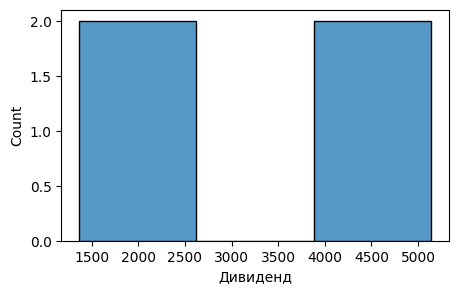

In [33]:
#посмотрим распределение целевого признака - размера дивидендов
plt.figure(figsize=(5,3))
sns.histplot(third_try.Дивиденд)

<Axes: xlabel='Коэффициент покрытия процентов', ylabel='Дивиденд'>

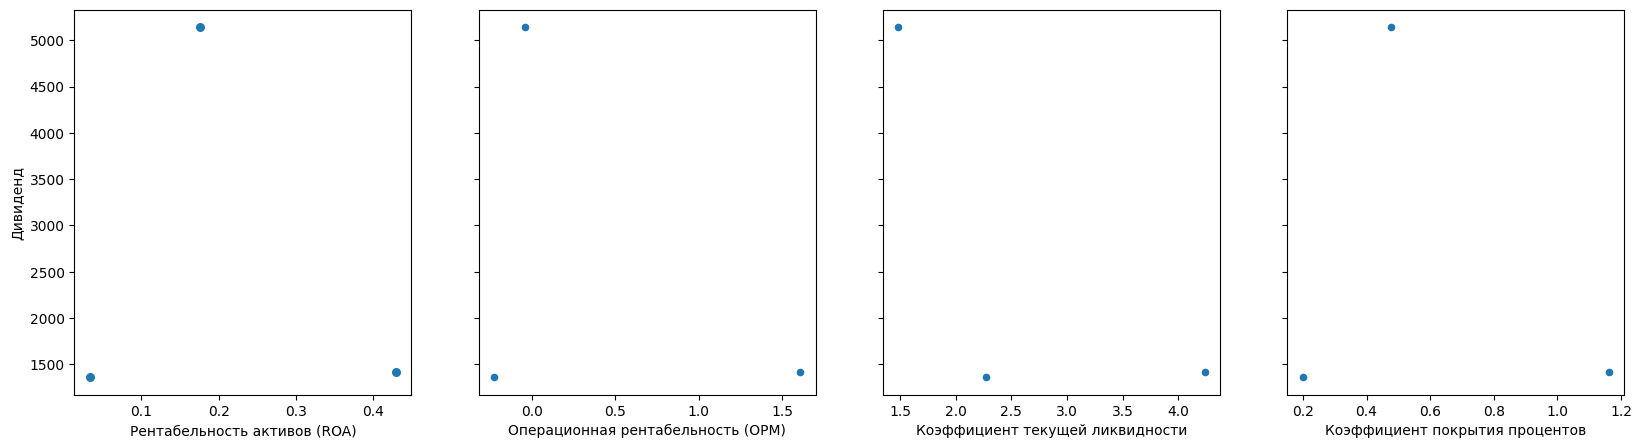

In [32]:
#посмотрим взаимосвязь между дивидендами и различными финансовыми показателями
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 4, sharey=True)

third_try.plot.scatter(x='Рентабельность активов (ROA)', y='Дивиденд', ax=axs[0], figsize=(20, 5), s = 30)
third_try.plot.scatter(x='Операционная рентабельность (OPM)', y='Дивиденд', ax=axs[1])
third_try.plot.scatter(x='Коэффициент текущей ликвидности', y='Дивиденд', ax=axs[2])
third_try.plot.scatter(x='Коэффициент покрытия процентов', y='Дивиденд', ax=axs[3])